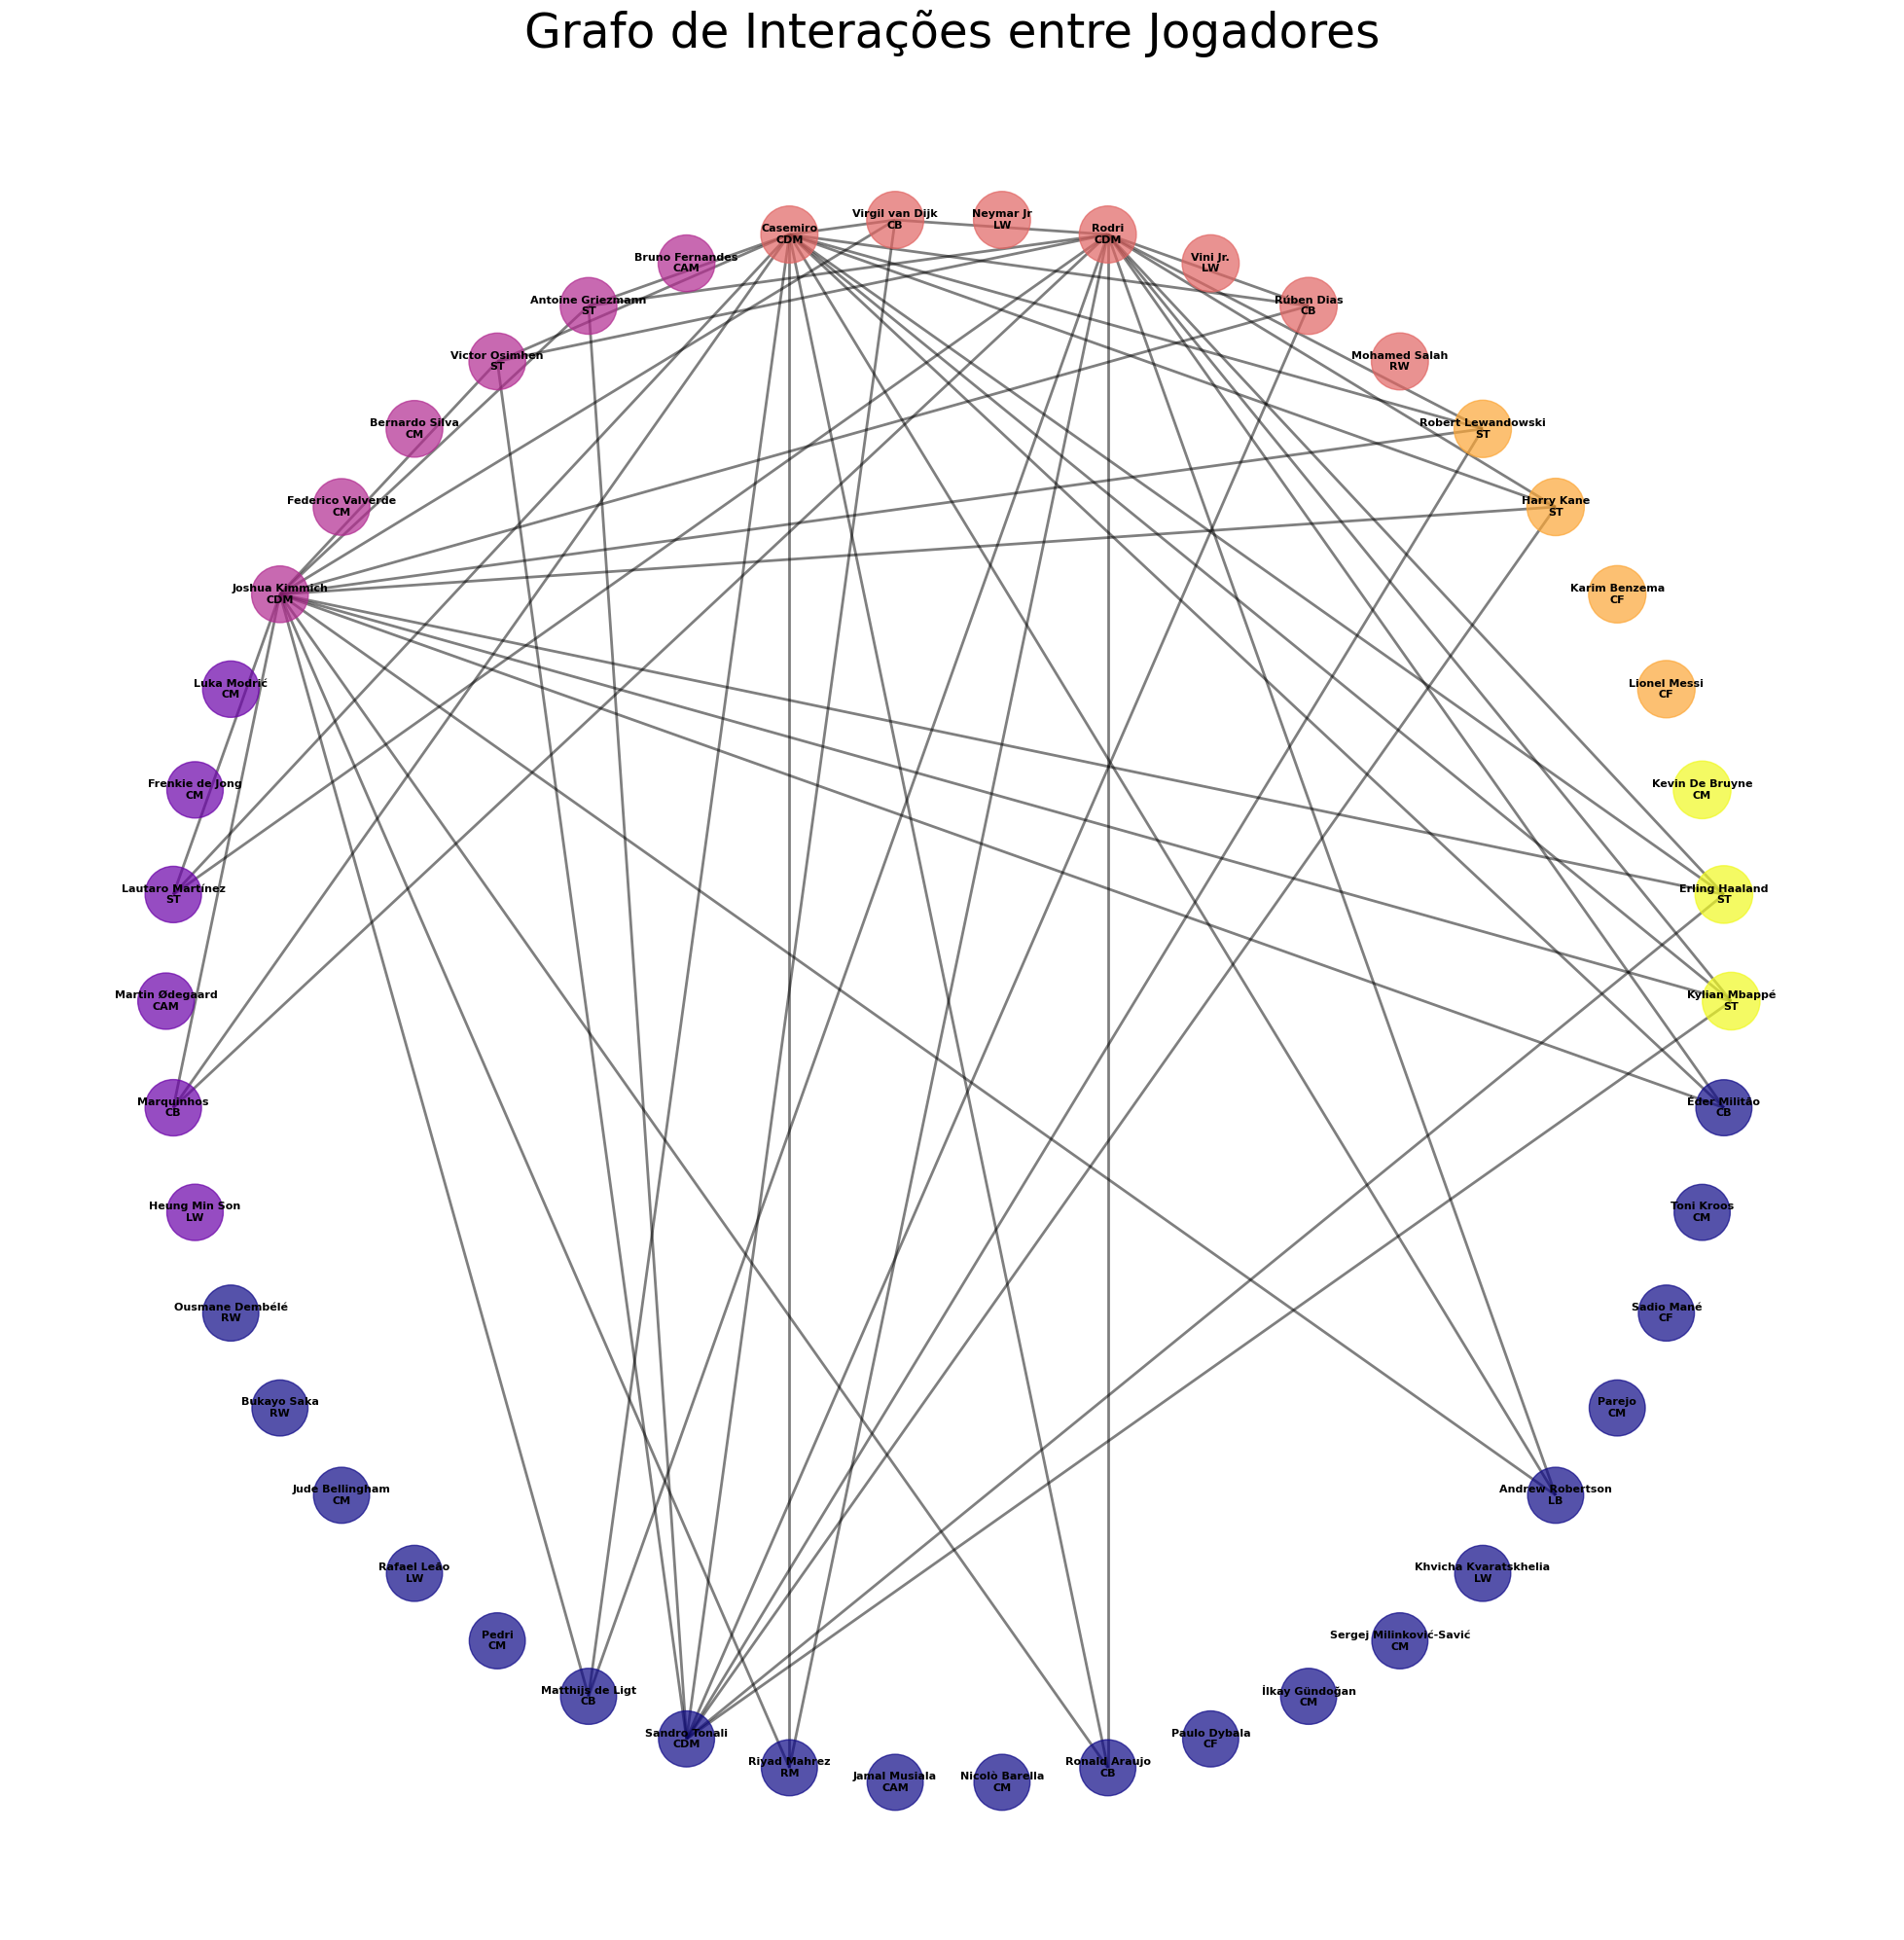

O grafo tem 53 arestas.


In [34]:
# Importando as bibliotecas necessárias
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Carregando o conjunto de dados
file_path = 'players_teste.csv'
players_data = pd.read_csv(file_path)

# Criando um grafo vazio
G = nx.Graph()

# Adicionando vértices (cada jogador é um vértice no grafo)
for index, row in players_data.iterrows():
    G.add_node(row['Name'], position=row['Position'], overall=row['Overall'])

# Agrupando jogadores por posição
players_by_position = defaultdict(list)
for index, row in players_data.iterrows():
    players_by_position[row['Position']].append(row)

# Dicionário de interações entre grupos de posições
position_interactions = {
    'CB': ['RWB', 'LWB', 'CDM'],
    'LB': ['LWB', 'CDM', 'LM'],
    'RB': ['RWB', 'CDM', 'RM'],
    'RWB': ['RB', 'RM', 'CDM'],
    'LWB': ['LB', 'LM', 'CDM'],
    'CDM': ['CB', 'RB', 'LB', 'RWB', 'LWB', 'RM', 'LM', 'ST'],
    'RM': ['RWB', 'CDM', 'RF'],
    'LM': ['LWB', 'CDM', 'LF'],
    'LF': ['LM', 'ST'],
    'ST': ['CDM', 'LF', 'RF'],
    'RF': ['RM', 'ST'],
}

# Definindo o threshold de 'Overall'
threshold = 87

# Adicionando arestas com base em interações e threshold de 'Overall'
for position, interacts_with in position_interactions.items():
    for player in players_by_position[position]:
        for target_position in interacts_with:
            for target_player in players_by_position[target_position]:
                avg_overall = (player['Overall'] + target_player['Overall']) / 2
                if avg_overall >= threshold:
                    G.add_edge(player['Name'], target_player['Name'], weight=avg_overall)

# Configuração para a visualização do grafo
plt.figure(figsize=(25, 25))  # Aumentar o tamanho da figura para melhor visualização
pos = nx.circular_layout(G)  # Mudando para um layout circular para espaçar uniformemente os nós

# Desenhando as arestas com uma largura visível e cor diferente
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='black')

# Desenhando os nós com um tamanho baseado no 'Overall', mas reduzido para evitar sobreposição
node_size = [G.nodes[node]['overall'] * 20 for node in G]  # Reduzindo o tamanho dos nós
node_color = [G.nodes[node]['overall'] for node in G]  # Cor dos nós baseado no 'Overall'
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.plasma, alpha=0.7)

# Desenhando os rótulos dentro dos nós
labels = {node: f"{node}\n{G.nodes[node]['position']}" for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='black', font_weight='bold', verticalalignment='center')

plt.title("Grafo de Interações entre Jogadores", size=35)
plt.axis('off')  # Remove os eixos para uma visualização mais limpa
plt.show()

# Verifique se as arestas foram criadas
print(f"O grafo tem {G.number_of_edges()} arestas.")